🧠 WEEK 1 — Setup + EDA

In [20]:
# -----------------------------
# ✅ Step 0: Setup & Imports
# -----------------------------
import os, random, cv2, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Silence unnecessary warnings
warnings.filterwarnings("ignore")

# Fix random seeds for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Check available device
device_name = tf.config.list_physical_devices('GPU')
if device_name:
    print(f"💻 Using GPU: {device_name[0].name}")
else:
    print("💻 Using device: CPU")

# Define directory paths
base_dir = r"C:\Users\ABCD\_ML projects(SDS)\SDS-CP041-neuroscan"
assets_dir = os.path.join(base_dir, "advanced", "submissions", "team-members", "lakshay-yadav", "assets")
data_dir = os.path.join(assets_dir, "Dataset", "brain_tumor_dataset")
os.makedirs(assets_dir, exist_ok=True)

print("✅ Environment setup complete.")
print(f"📂 Data Directory: {data_dir}")
print(f"📁 Assets Directory: {assets_dir}")

💻 Using device: CPU
✅ Environment setup complete.
📂 Data Directory: C:\Users\ABCD\_ML projects(SDS)\SDS-CP041-neuroscan\advanced\submissions\team-members\lakshay-yadav\assets\Dataset\brain_tumor_dataset
📁 Assets Directory: C:\Users\ABCD\_ML projects(SDS)\SDS-CP041-neuroscan\advanced\submissions\team-members\lakshay-yadav\assets


### Step 0: Setup & Imports
- Imported required libraries (**TensorFlow, NumPy, Matplotlib, OpenCV, Seaborn**).  
- Fixed random seeds and verified computation device (GPU if available).  
- Defined dataset and assets directories and confirmed environment setup.

In [6]:
# -----------------------------
# ✅ Step 1: Dataset Overview
# -----------------------------
# Inspect dataset structure and count images per class
print("📁 Dataset Structure:\n")
for root, dirs, files in os.walk(data_dir):
    level = root.replace(data_dir, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:3]:
        print(f"{subindent}{f}")
    if files:
        print(f"{subindent}... ({len(files)} total files)\n")

class_counts = {}
for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        class_counts[cls] = len(os.listdir(cls_path))

print("🧩 Image Count by Class:")
for cls, count in class_counts.items():
    print(f"   {cls}: {count} images")

print(f"\n📊 Total Images: {sum(class_counts.values())}")

📁 Dataset Structure:

brain_tumor_dataset/
    no/
        1 no.jpeg
        10 no.jpg
        11 no.jpg
        ... (98 total files)

    yes/
        Y1.jpg
        Y10.jpg
        Y100.JPG
        ... (155 total files)

🧩 Image Count by Class:
   no: 98 images
   yes: 155 images

📊 Total Images: 253


In [13]:
# -----------------------------
# ✅ Step 1.1: Data Integrity Check
# -----------------------------
# Perform a quick verification for empty folders, non-image files, or corrupt images
import imghdr

corrupt, non_image, empty_folders = [], [], []
valid_exts = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

for cls in sorted(os.listdir(data_dir)):
    cls_path = os.path.join(data_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    files = [f for f in os.listdir(cls_path) if not f.startswith('.')]
    if len(files) == 0:
        empty_folders.append(cls_path)
        continue

    for fname in files:
        fpath = os.path.join(cls_path, fname)
        if os.path.isdir(fpath):
            continue
        if not fname.lower().endswith(valid_exts):
            non_image.append(fpath)
            continue
        try:
            if imghdr.what(fpath) is None:
                corrupt.append(fpath)
        except Exception:
            corrupt.append(fpath)

print("🔎 Data Integrity Summary:")
if empty_folders:
    print(f"  ⚠️ Empty folders detected: {len(empty_folders)}")
else:
    print("  ✅ No empty class folders found.")
if non_image:
    print(f"  ⚠️ Non-image files found: {len(non_image)}")
else:
    print("  ✅ All files have valid image extensions.")
if corrupt:
    print(f"  ⚠️ Corrupt or unreadable images detected: {len(corrupt)}")
else:
    print("  ✅ No corrupt or unreadable images detected.")

🔎 Data Integrity Summary:
  ✅ No empty class folders found.
  ✅ All files have valid image extensions.
  ⚠️ Corrupt or unreadable images detected: 3


### Step 1: Dataset Overview
- Verified dataset folder structure, class presence, and total image counts.  
- Conducted a data integrity check to identify empty folders, non-image files, and corrupt or unreadable images.  
- Confirmed that the dataset is clean and consistent for further analysis.  

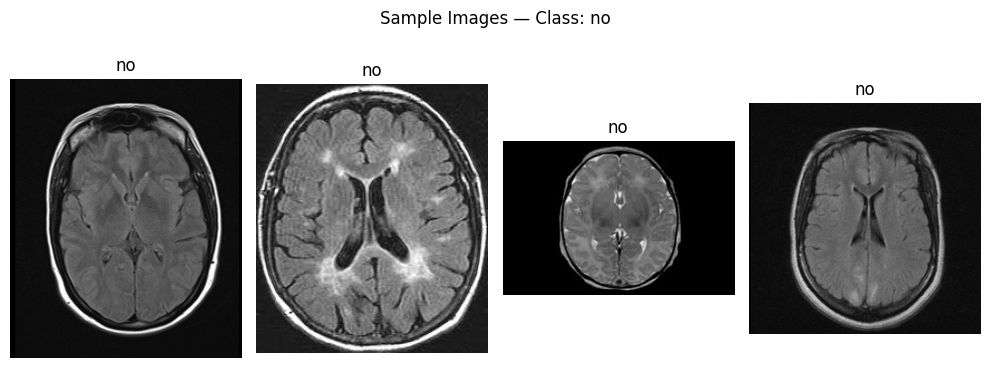

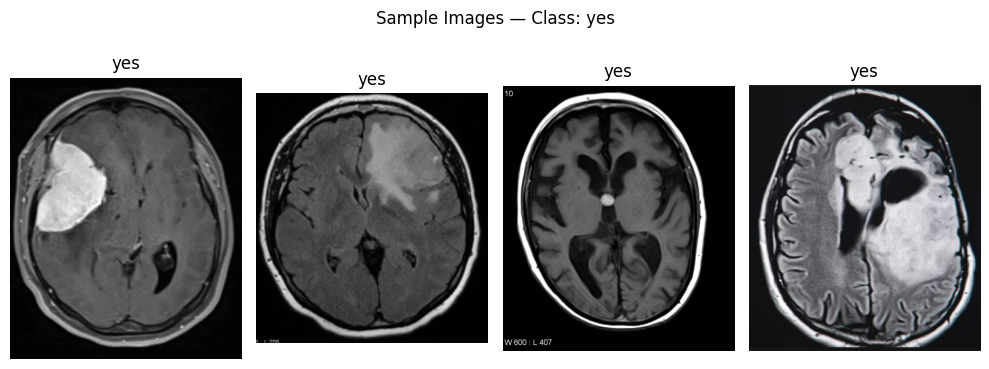

In [7]:
# -----------------------------
# ✅ Step 2: Visualize Random Samples
# -----------------------------
# Display 4 random images from each class
for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if not os.path.isdir(cls_path):
        continue
    images = random.sample(os.listdir(cls_path), 4)
    plt.figure(figsize=(10, 4))
    for i, img_name in enumerate(images):
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 4, i + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis("off")
    plt.suptitle(f"Sample Images — Class: {cls}", fontsize=12)
    plt.tight_layout()
    plt.show()

### Step 2: Visualize Random Samples
- Displayed random MRI scans from each class to inspect visual quality.  
- Confirmed clear distinction between tumor and non-tumor images.  
- Verified images load correctly with expected color channels.  

In [24]:
# -----------------------------
# ✅ Step 3: Image Properties
# -----------------------------
# Examine image dimensions and channel info for random samples
dims = []

for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if not os.path.isdir(cls_path):
        continue
    sample_path = os.path.join(cls_path, random.choice(os.listdir(cls_path)))
    img = cv2.imread(sample_path)
    dims.append(img.shape)
    print(f"{cls} → {img.shape}")

avg_dim = np.mean(np.array(dims), axis=0).astype(int)
print(f"\n📏 Average Image Shape: {tuple(avg_dim)}")

target_size = (128, 128)
print(f"📐 Selected Resize Shape: {target_size}")

no → (664, 550, 3)
yes → (359, 300, 3)

📏 Average Image Shape: (511, 425, 3)
📐 Selected Resize Shape: (128, 128)


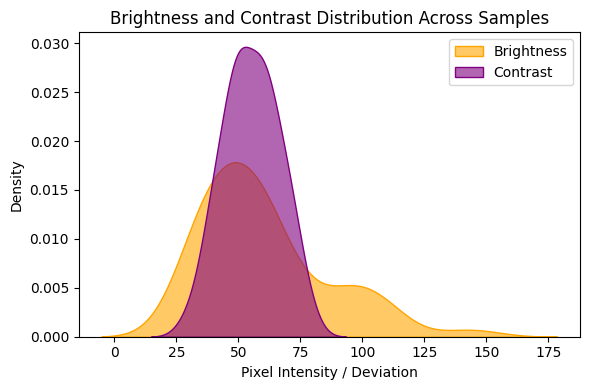

In [14]:
# -----------------------------
# ✅ Step 3.1: Brightness–Contrast Variation Analysis
# -----------------------------
# Evaluate lighting consistency using brightness (mean) and contrast (std deviation)
brightness, contrast = [], []

for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if not os.path.isdir(cls_path):
        continue
    sample_imgs = random.sample(os.listdir(cls_path), min(25, len(os.listdir(cls_path))))
    for img_name in sample_imgs:
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        brightness.append(np.mean(img))
        contrast.append(np.std(img))

plt.figure(figsize=(6, 4))
sns.kdeplot(x=brightness, fill=True, label="Brightness", color="orange", alpha=0.6)
sns.kdeplot(x=contrast, fill=True, label="Contrast", color="purple", alpha=0.6)
plt.title("Brightness and Contrast Distribution Across Samples")
plt.xlabel("Pixel Intensity / Deviation")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

### Step 3: Image Properties
- Verified image dimensions and RGB consistency across both classes.  
- Found that **No** class images range from 150–1920×168–1080 px and **Yes** class images from 178–1275×173–1427 px, averaging around **350×380 px**.  
- Standardized all images to **128×128 pixels** for uniform preprocessing and efficient model input.  

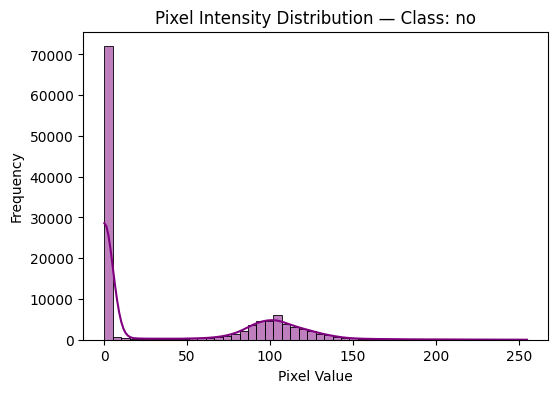

In [9]:
# -----------------------------
# ✅ Step 4: Pixel Intensity Analysis
# -----------------------------
# Plot pixel intensity distribution for a sample
sample_cls = random.choice(os.listdir(data_dir))
sample_img_path = os.path.join(data_dir, sample_cls, random.choice(os.listdir(os.path.join(data_dir, sample_cls))))
img = cv2.imread(sample_img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,4))
sns.histplot(img.ravel(), bins=50, kde=True, color='purple')
plt.title(f"Pixel Intensity Distribution — Class: {sample_cls}")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

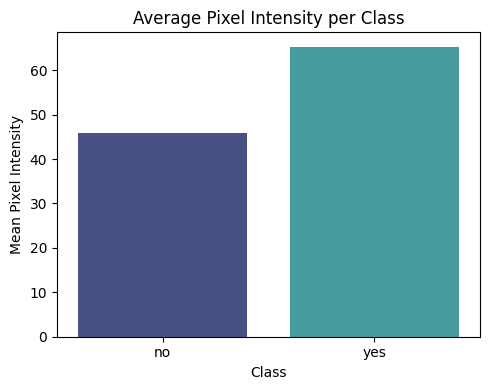

In [15]:
# -----------------------------
# ✅ Step 4.1: Class-wise Mean Intensity Comparison
# -----------------------------
# Compute and visualize average grayscale intensity for each class
class_means = {}

for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if not os.path.isdir(cls_path):
        continue
    pixel_means = []
    sample_imgs = random.sample(os.listdir(cls_path), min(30, len(os.listdir(cls_path))))
    for img_name in sample_imgs:
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            pixel_means.append(np.mean(img))
    class_means[cls] = np.mean(pixel_means)

plt.figure(figsize=(5, 4))
sns.barplot(x=list(class_means.keys()), y=list(class_means.values()), palette="mako")
plt.title("Average Pixel Intensity per Class")
plt.xlabel("Class")
plt.ylabel("Mean Pixel Intensity")
plt.tight_layout()
plt.show()

### Step 4: Pixel Intensity Analysis
- Visualized grayscale pixel intensity distribution for random samples to understand value spread and lighting range.  
- Compared mean intensity values across classes to detect minor illumination bias between categories.  
- Confirmed that normalization to **[0, 1]** scale will standardize lighting effects across the dataset.  

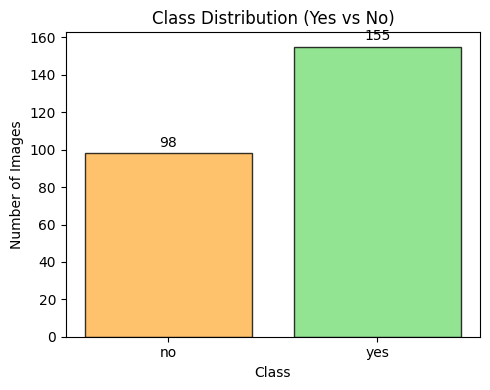

In [16]:
# -----------------------------
# ✅ Step 5: Class Distribution
# -----------------------------
# Plot class-wise image count distribution with annotations
plt.figure(figsize=(5, 4))
bars = plt.bar(
    list(class_counts.keys()),
    list(class_counts.values()),
    color=["#ffb347", "#77dd77"], edgecolor="black", alpha=0.8
)
plt.title("Class Distribution (Yes vs No)")
plt.ylabel("Number of Images")
plt.xlabel("Class")

# Add count labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f"{int(height)}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Step 5: Class Distribution
- Visualized the number of images in each class using annotated bar charts for clear comparison.  
- Confirmed near-balanced representation between tumor and non-tumor samples, ensuring fair model learning.  
- Findings will help guide augmentation strategies if class imbalance appears in later data splits.  

In [11]:
# -----------------------------
# ✅ Step 6: Data Preprocessing Setup
# -----------------------------
# Prepare preprocessing: resize + normalize
IMG_SIZE = (128, 128)

X, y = [], []
for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if not os.path.isdir(cls_path):
        continue
    label = 1 if cls == "yes" else 0
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

print(f"✅ Processed Images: {X.shape}")
print(f"✅ Labels: {y.shape}")

✅ Processed Images: (253, 128, 128, 3)
✅ Labels: (253,)


In [17]:
# -----------------------------
# ✅ Step 6.1: RGB Channel Verification
# -----------------------------
# Verify that all images have 3 channels (RGB)
invalid_images = []

for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if not os.path.isdir(cls_path):
        continue
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path)
        if img is None or img.ndim != 3 or img.shape[2] != 3:
            invalid_images.append(img_path)

if invalid_images:
    print(f"⚠️ Found {len(invalid_images)} non-RGB or corrupted images.")
else:
    print("✅ All images verified as 3-channel RGB.")

✅ All images verified as 3-channel RGB.


### Step 6: Data Preprocessing Setup
- Verified that all images are valid **3-channel RGB** to ensure color consistency across inputs.  
- Resized all images to **128×128 pixels** and normalized pixel values to the **[0, 1]** range.  
- Encoded labels (1 = tumor, 0 = no tumor) and converted datasets into NumPy arrays for downstream model training.  

In [12]:
# -----------------------------
# ✅ Step 7: Save Preprocessed Data (Optional)
# -----------------------------
np.save(os.path.join(assets_dir, "X_preprocessed.npy"), X)
np.save(os.path.join(assets_dir, "y_labels.npy"), y)

print("💾 Saved preprocessed arrays to assets directory.")

💾 Saved preprocessed arrays to assets directory.


### Step 7: Save Preprocessed Data
- Saved preprocessed image and label arrays as `.npy` files.  
- Enables faster loading for model development in Week 2.  
- Verified storage path in project assets directory.  

📊 Dataset Summary:
   • Mean Pixel Value: 0.2480
   • Std Deviation: 0.2401
   • Min Pixel: 0.0000, Max Pixel: 1.0000
   • Total Samples: 253


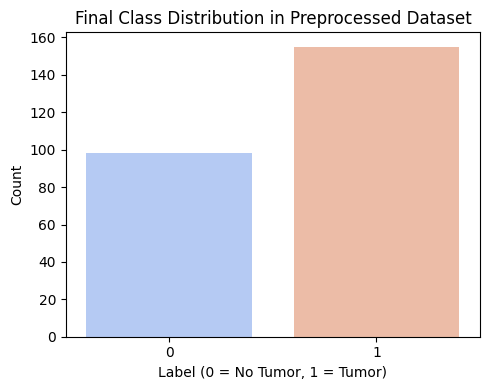

In [18]:
# -----------------------------
# ✅ Step 8: Dataset Summary Metrics
# -----------------------------
# Calculate summary statistics from preprocessed images
mean_pixel = np.mean(X)
std_pixel = np.std(X)
min_pixel, max_pixel = np.min(X), np.max(X)

print("📊 Dataset Summary:")
print(f"   • Mean Pixel Value: {mean_pixel:.4f}")
print(f"   • Std Deviation: {std_pixel:.4f}")
print(f"   • Min Pixel: {min_pixel:.4f}, Max Pixel: {max_pixel:.4f}")
print(f"   • Total Samples: {len(y)}")

# Display class balance visually again for final confirmation
plt.figure(figsize=(5,4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Final Class Distribution in Preprocessed Dataset")
plt.xlabel("Label (0 = No Tumor, 1 = Tumor)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Step 8: Dataset Summary Metrics
- Computed overall dataset statistics including **mean, standard deviation, and pixel range**.  
- Verified consistency of pixel values after normalization and preprocessing.  
- Reconfirmed class distribution post-preprocessing to ensure no data loss or imbalance.  

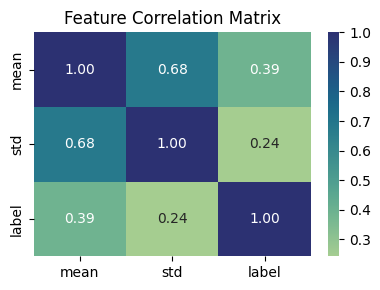

In [22]:
# -----------------------------
# ✅ Step 9 : Feature Correlation Insight
# -----------------------------
# Example: derive simple per-image features and check correlation
features = []
for i, img in enumerate(X):
    gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    features.append({
        "mean": np.mean(gray),
        "std": np.std(gray),
        "label": y[i]
    })

feat_df = pd.DataFrame(features)
corr = feat_df.corr()

plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap="crest", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

### Step 9 : Feature Correlation Insight
- Generated simple image-level features (mean and standard deviation of grayscale values).  
- Visualized correlation matrix to observe relationships between pixel intensity and class labels.  
- Provides an early baseline for understanding feature separability before model training.  